# Mapping Climate Data
### Authors

Fletcher Hozven fhozven@ucsb.edu

### Table of Contents

[Goals](#purpose)

[Import Packages and Open Your Climate Data](#path)

[Download and Import Cartopy](#Cartopy)

[Call out variable and convert to celsius](#call_out)

[Weigh the grid cells and Apply Weights](#weight)

[Define the Time Period We Are Mapping](#time)

[Map our Global Mean State Map](#map)

[Map with a Sepcific Region](#map2)

<a id='purpose'></a> 
## **Goals**

In this tutorial, we will be mapping our climate data. Mapping climate data is crucial for understanding and visualizing complex climate patterns, predicting future climate, studying climate change, and informing decisions related to environmental planning and disaster management. 

This tutorial builds on our knowledge of weighing grid cells in our [global average tutorial](https://github.com/climate-datalab/Cimate-Data-Lab-Tutorials/blob/main/5.%20Weight%20Grid%20Cells%20%2B%20Plot%20Global%20Average.ipynb) and also defining a specific region in our [regional average tutorial](https://github.com/climate-datalab/Cimate-Data-Lab-Tutorials/blob/main/4.%20Regional%20Average%20Tutorial%20.ipynb).

Here is an example of a climate map from NOAA showing the difference in April Preciptation on a United States Map

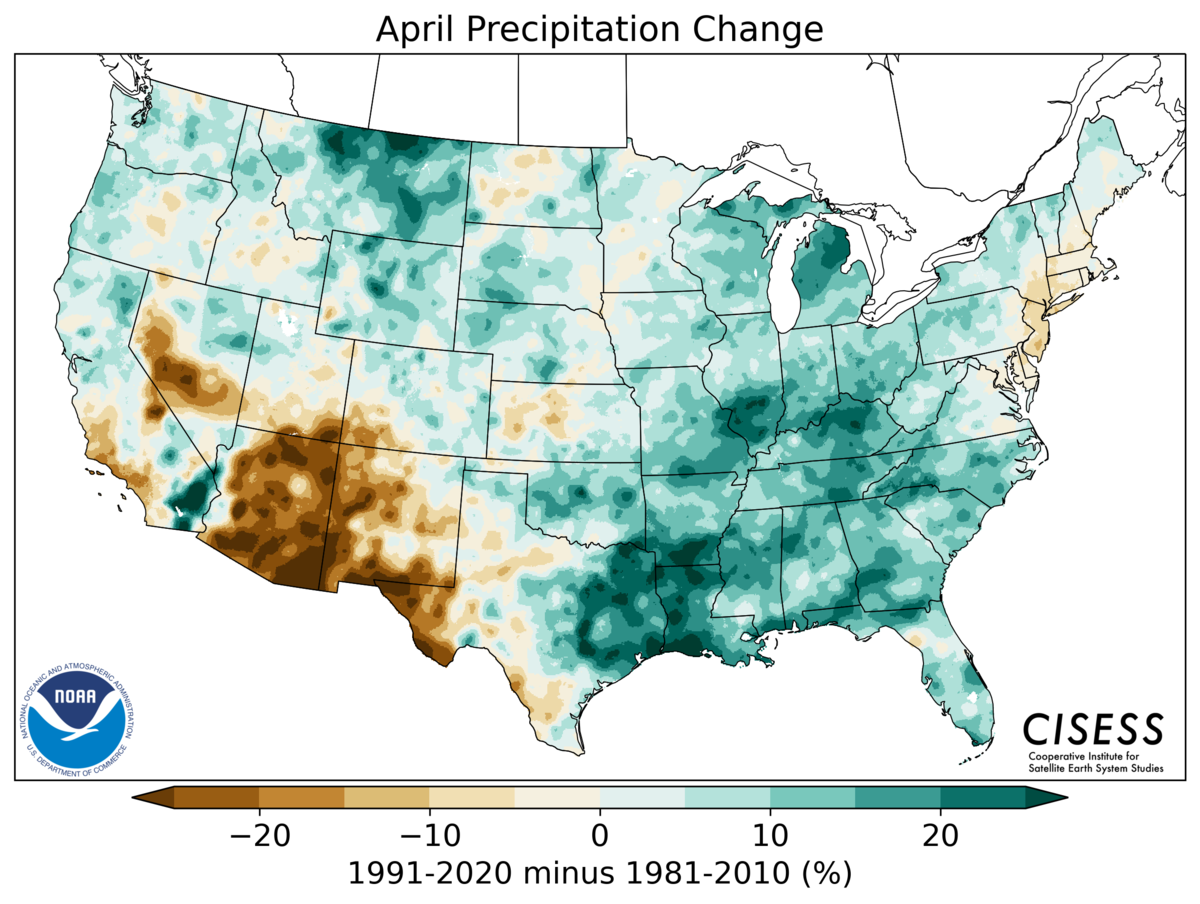


<a id='Path'></a> 
## **Import Packages and Open Your Climate Data**

In [745]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [746]:
data = xr.open_dataset('/Users/fletcherhoz/Desktop/tas_Amon_BCC-CSM2-MR_amip-future4K_r1i1p1f1_gn_197901-201412.nc').squeeze()

<a id='Cartopy'></a> 
## **Download and Import Cartopy**

_What is `Cartopy?`_

Cartopy has exposed an interface to enable easy map creation using matplotlib. Creating a basic map is as simple as telling matplotlib to use a specific map projection, and then adding some coastlines to the axes.

Download: Using your terminal paste:

`conda install conda-forge::cartopy`

Then import by pasting into your notebook code:

In [750]:
import cartopy.crs as ccrs

We will also import `cartopy.feature` which allows us to add features on our map such as coastlines

In [752]:
import cartopy.feature as cfeature

<a id='call_out'></a> 
## **Call out variable and convert to celsius** 

First lets call out the variable
- For me this is "tas" however it can be replaced with whatever data you are working with

In [755]:
temp_data = data.tas
temp_data = temp_data - 273.15

Now lets define the function weights and apply the weights function to weigh the data by grid cell

<a id='weight'></a>
## **Weigh the grid cells and Apply Weights**

We will weigh the grid cells by creatig a weighing function by using `def` and `return` functions
- We will call the functions `weights(w)`
- `np.cos(np.deg2rad(w.lat))` is calucltaing the cosine of latitude
-  ` coslat / coslat.mean(dim='lat')` is normalize weights by the mean
-  `return computed_weight` is returning the real value of the weighted grid cells

In [758]:
def weights(w):
    coslat = np.cos(np.deg2rad(w.lat))
    weight_factor = coslat / coslat.mean(dim='lat')
    computed_weight = w * weight_factor
    return computed_weight

Apply the newly created function `weights` to the temperature data

In [760]:
weighted_temp = weights(temp_data)

<a id='time'></a> 
## **Define the Time Period We Are Mapping**
For the plots we previously have gone over, we would have time be our x axis and average out the latitude and longitude coordinates and plot the varible vs the time. 

For this case since we are taking each latitude and longitude coordinate into account and plotting it on a map we are going to average out the timeperiod we choose so instead it will be the varible we chose and its relation to the location on the globe.

We will do this by using `.sel` and `slice`function to select the time in our data and slice it for whatever time period we want to anaylze

In [762]:
temp_data_1990_2010= weighted_temp.sel(time=slice("1990-01-01", "2010-12-31"))

Now we need to average out the time so we can have one time value that we can plot on our map

In [806]:
global_temp_data= temp_data_1990_2010.mean(dim=["time"])

<a id='Map'></a> 
## **Now lets Map our Global Mean State Map!**
To Start we will create a GeoAxes object that uses the PlateCarree projection.
- `PlateCarree` is a global lat-lon map projection in which each point is evenly spaced in terms of degrees.
- It is a part of the Cartopy package

In [766]:
map = ccrs.PlateCarree()

Breakdown of each code line of the Plot
#### 1.  fig, ax =
- `plt.subplots(figsize=(14, 8))`: Creates a figure and a set of axes for plotting. You can cutomize figsize
- `subplot_kw={"projection": map}`: This sets the map projection for the plot. The map variable was defined above through cartopy.crs

#### 2. plot = 
- `ax.pcolormesh()`: This function creates a 2D color mesh plot
- `global_temp_data.lon and global_temp_data.lat`: These are the longitude and latitude values that are used for the x and y axes 
- `global_temp_data`: This is the variable containing the temperature data that will be plotted
- `transform=map`: This argument specifies that the data will be projected using the defined map projection. We defined map above
- `cmap="coolwarm"`: This sets the colormap to "coolwarm"

#### 3. cbar =
- `plt.colorbar()`: This adds a color bar to the plot, which represents the temperature
- `plot`: This links the color bar with the plot.
- `ax=ax`: Tells the color bar should be added to the same axes as the plot.
- `cbar.set_label("Temperature (°C)")` = This sets the label for the color bar.

#### 5. Features Added
- `ax.add_feature(cfeature.COASTLINE)`: Adds a Coastline
- `ax.add_feature(cfeature.BORDERS, linestyle=":")`: This adds political borders between countries to the map and draws borders with a dotted line.

#### 6. gl =
- `ax.gridlines(draw_labels=True, linestyle="--")`: This adds gridlines to the plot and labels to gridlines with -- linestyle
- `gl.top_labels = False` : Removes latitude labels on the top side of the plot.
  
#### 7. title =
- `ax.set_title("Near Air Surface Temperature Mean State Map (1990-2010)")`
- fontsize= 20
- Sets the title for the plot.

#### 8. `plt.show():` 
- This displays the plot.

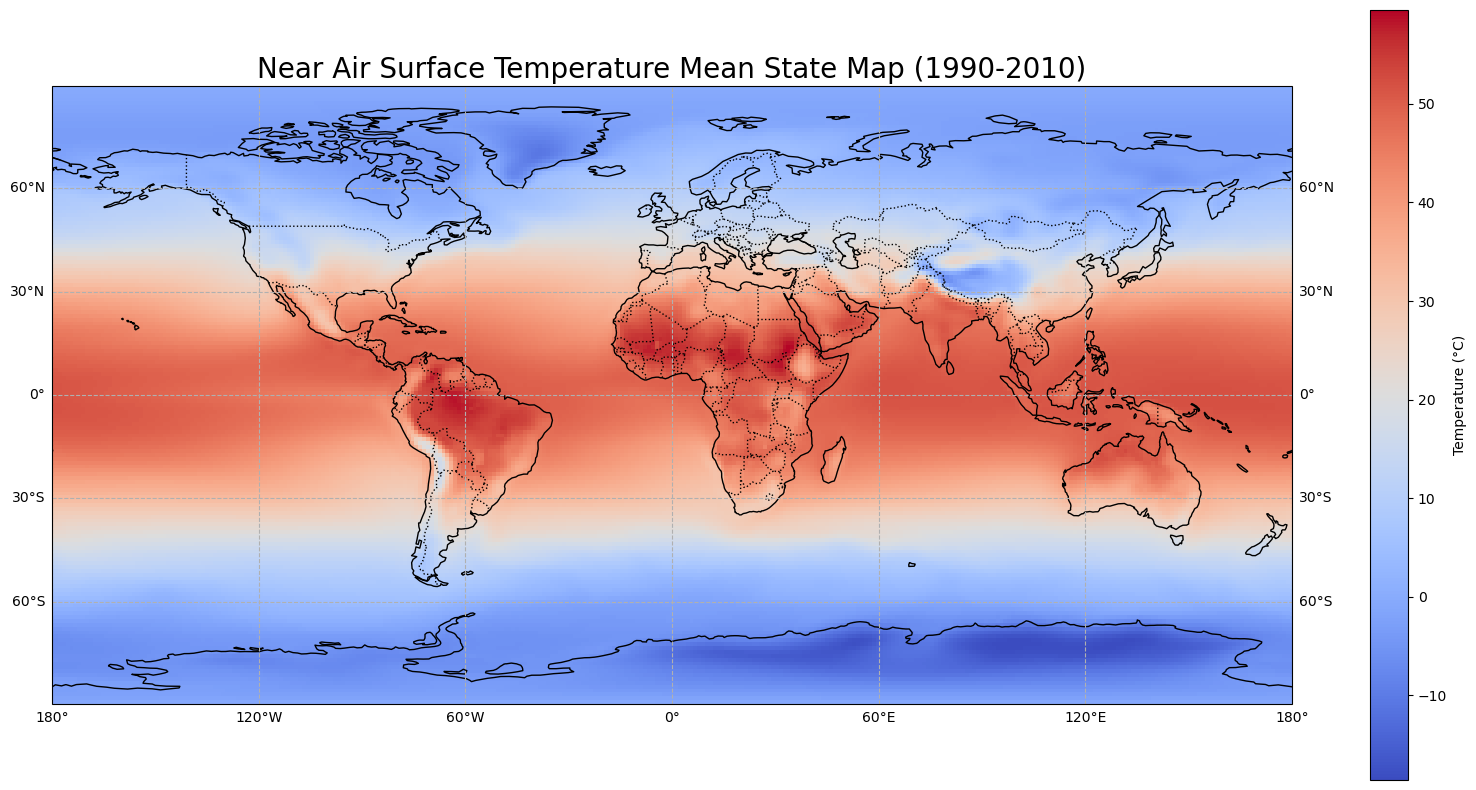

In [768]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})
plot = ax.pcolormesh(global_temp_data.lon, global_temp_data.lat, global_temp_data, transform=map, cmap="coolwarm")
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")


ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")


gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False

ax.set_title("Near Air Surface Temperature Mean State Map (1990-2010)",fontsize= 20)
plt.show()

#### Great Job !!

If you want a specific region instead of mapping the climate data globally add the step of defining the region described in our [Regional Average](https://github.com/climate-datalab/Cimate-Data-Lab-Tutorials/blob/main/4.%20Regional%20Average%20Tutorial%20.ipynb) tutorial 

I will write the code for this below for you to better assist you defining a region!

<a id='Map2'></a> 
## **Map with a Sepcific Region**

Code of a map for the Near Air Surface Temperature for the Region of USA. Replace with desired varible and coordinates

Import and Open Data

In [773]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
data = xr.open_dataset('/Users/fletcherhoz/Desktop/tas_Amon_BCC-CSM2-MR_amip-future4K_r1i1p1f1_gn_197901-201412.nc').squeeze()

Desired Time

In [775]:
data = data.sel(time=slice('1990-01-01','2010-12-31'))

Get Variable (replace with your desired variable) and convert celsius

In [777]:
tas = data.tas
tas = data.tas - 273.15

Define Region (replace with your desired coordinates)

In [779]:
lat_min, lat_max = 22, 53
lon_min, lon_max = 230, 294

Defines latitude and longitude masks for New York City using the dataset.

In [781]:
tas_USA_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_USA_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)
tas_USA = tas.where(tas_USA_lat & tas_USA_lon, drop=True)

Average out time

In [783]:
USA_Temp = tas_USA.mean(dim=["time"])

Plot!!!

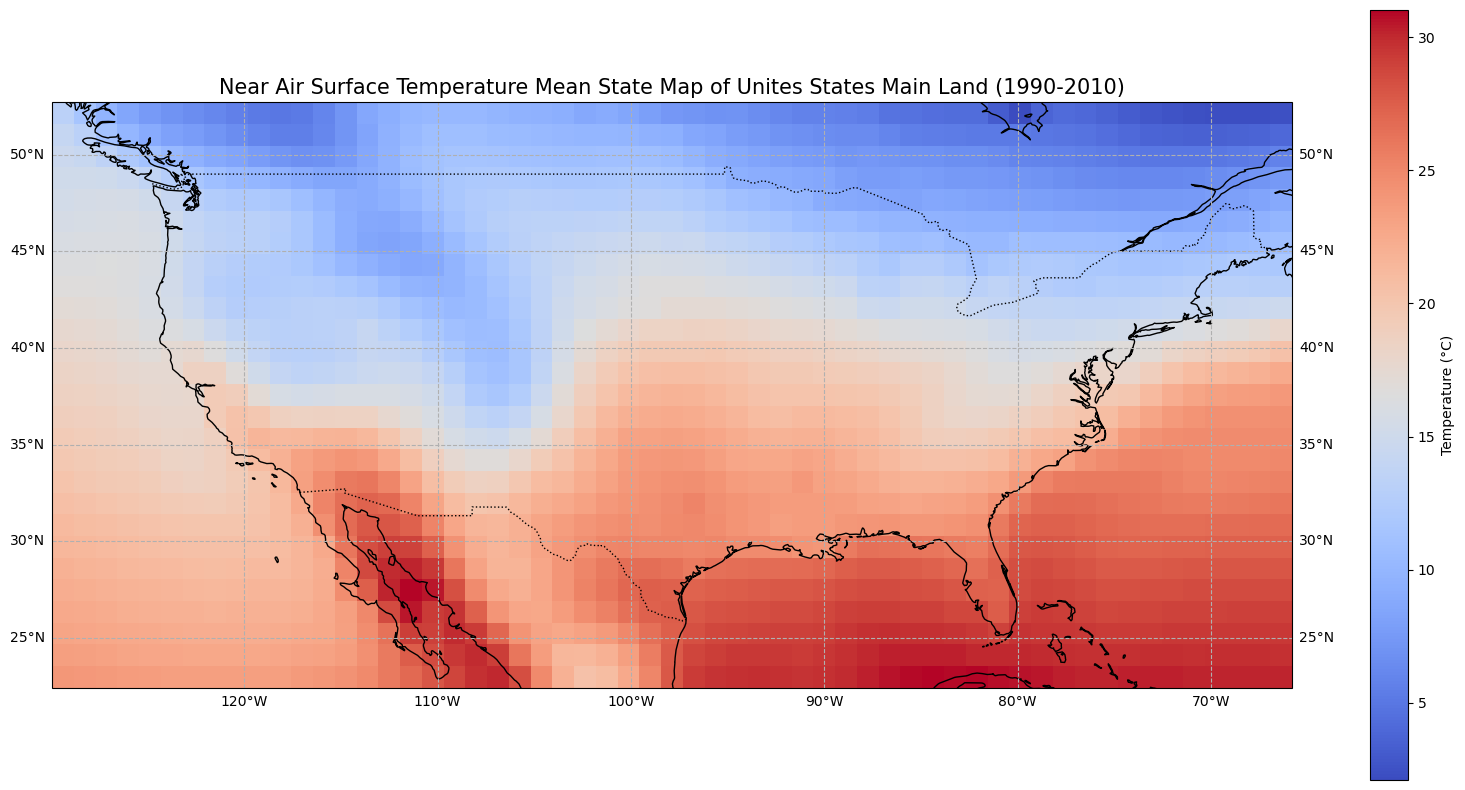

In [785]:
map = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": map})
plot = ax.pcolormesh(USA_Temp.lon, USA_Temp.lat, USA_Temp, transform=map, cmap="coolwarm")
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)")


ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")


gl = ax.gridlines(draw_labels=True, linestyle="--")
gl.top_labels = False

ax.set_title("Near Air Surface Temperature Mean State Map of Unites States Main Land (1990-2010)",fontsize= 15)
plt.show()